In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score  
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [2]:
#load data
water = pd.read_csv('/kaggle/input/water-data/waterQuality1.csv')

# **EDA**

In [3]:
water.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
#show coulmns in dataset
water.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [5]:
#n. of rows and columns
water.shape

(7999, 21)

Observation:


1- There's 7999 samples of water (ROWS)

---
2- There's 21 features including the the target class (COLUMNS)


In [6]:
water['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

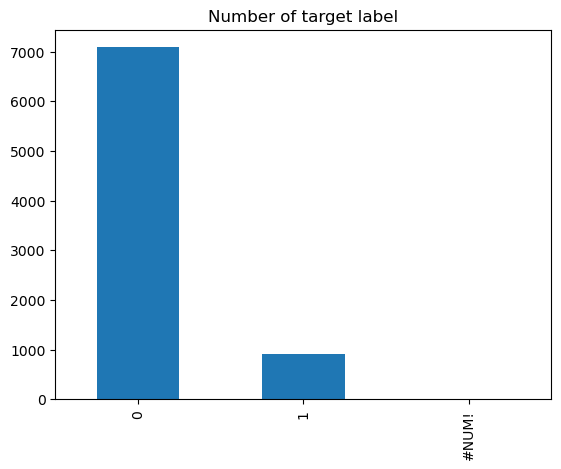

In [7]:
water.is_safe.value_counts().plot(kind ='bar')

plt.title('Number of target label')

#show the plot
plt.show()

In [8]:
#type of variables 
water.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

In [9]:
#more info
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Observation:
As we see all the data is numeric

In [10]:
#Finding null values
water.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

Observation:


1.  There's no field with null values



In [11]:
#find count ,mean and std of values 
water.describe().T.round(2)
 # for Including only numeric columns in a DataFrame description. include=[np.number]

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.67,1.27,0.0,0.04,0.07,0.28,5.05
arsenic,7999.0,0.16,0.25,0.0,0.03,0.05,0.10,1.05
barium,7999.0,1.57,1.22,0.0,0.56,1.19,2.48,4.94
cadmium,7999.0,0.04,0.04,0.0,0.01,0.04,0.07,0.13
chloramine,7999.0,2.18,2.57,0.0,0.10,0.53,4.24,8.68
chromium,7999.0,0.25,0.27,0.0,0.05,0.09,0.44,0.90
copper,7999.0,0.81,0.65,0.0,0.09,0.75,1.39,2.00
flouride,7999.0,0.77,0.44,0.0,0.40,0.77,1.16,1.50
bacteria,7999.0,0.32,0.33,0.0,0.00,0.22,0.61,1.00
viruses,7999.0,0.33,0.38,0.0,0.00,0.01,0.70,1.00


In [12]:
water.is_safe.unique()

array(['1', '0', '#NUM!'], dtype=object)

Text(0.5, 1.0, 'The impact of aluminium on the classifying')

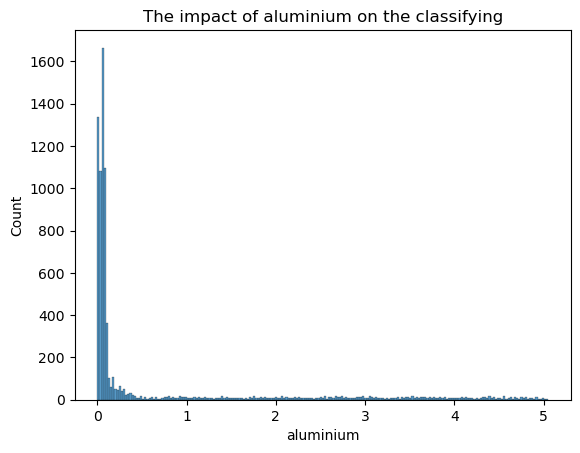

In [13]:
sns.histplot(water['aluminium'])
plt.title('The impact of aluminium on the classifying')

Text(0.5, 1.0, 'The impact of cadmium on the classifying')

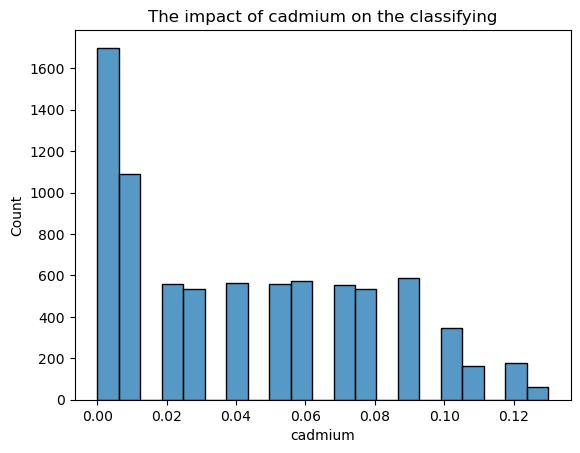

In [14]:
sns.histplot(water['cadmium'])
plt.title('The impact of cadmium on the classifying')

Text(0.5, 1.0, 'The impact of perchlorate on the classifying')

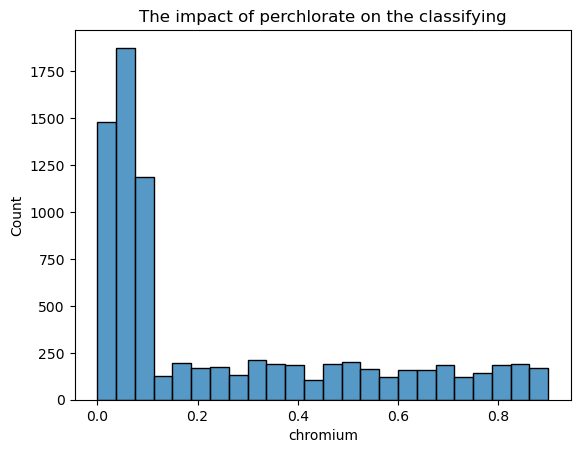

In [15]:
sns.histplot(water['chromium'])
plt.title('The impact of perchlorate on the classifying')

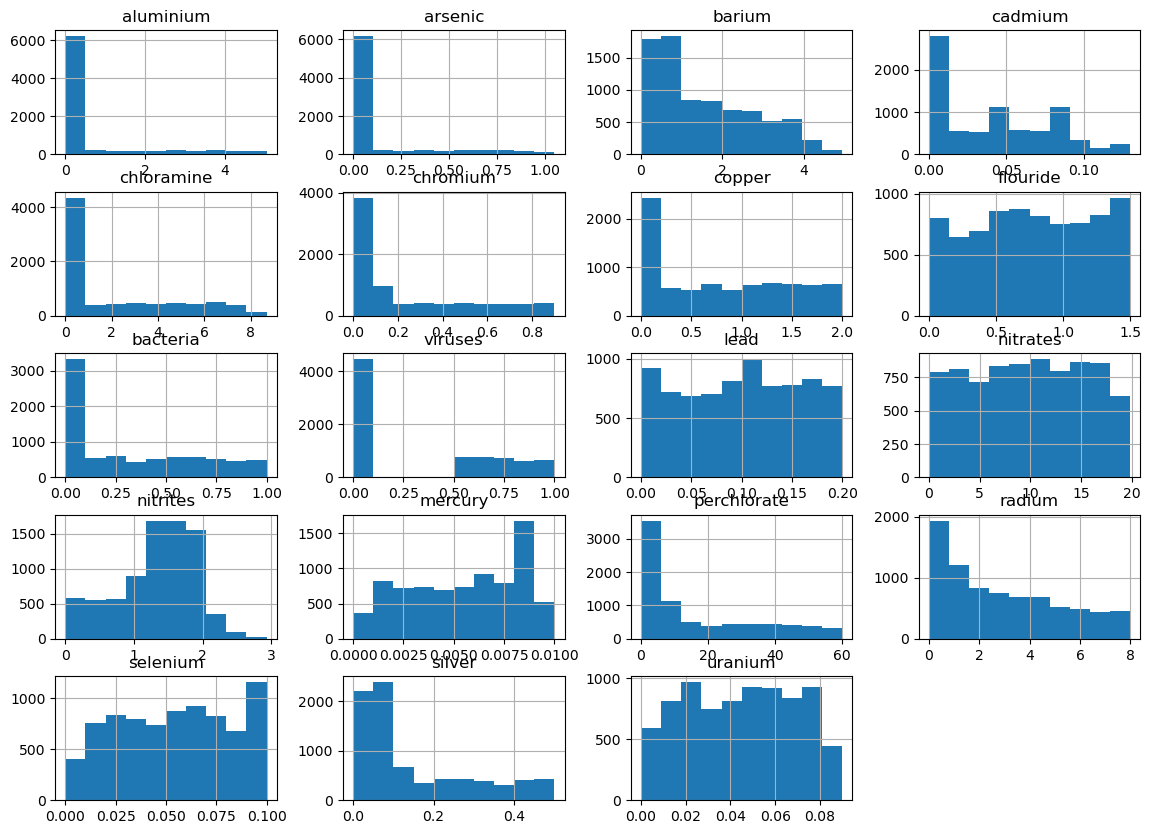

In [16]:
water.hist(figsize=(14,10));

/tmp/ipykernel_32/3474614056.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(water.corr(),cmap='Blues');


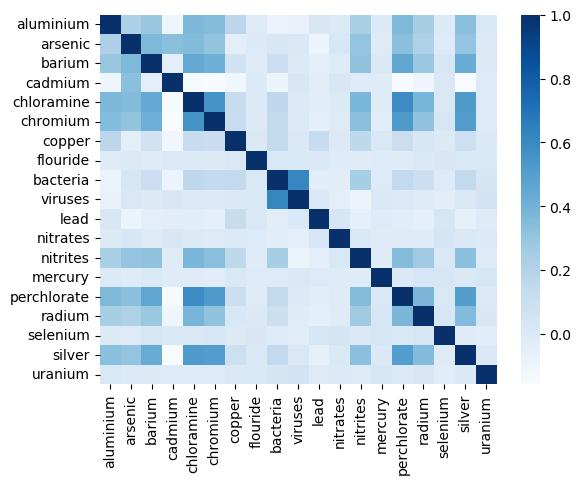

In [17]:
sns.heatmap(water.corr(),cmap='Blues');

Observation:


1.   Looks that the features correlated to each other.
It calls the case of collinearity 



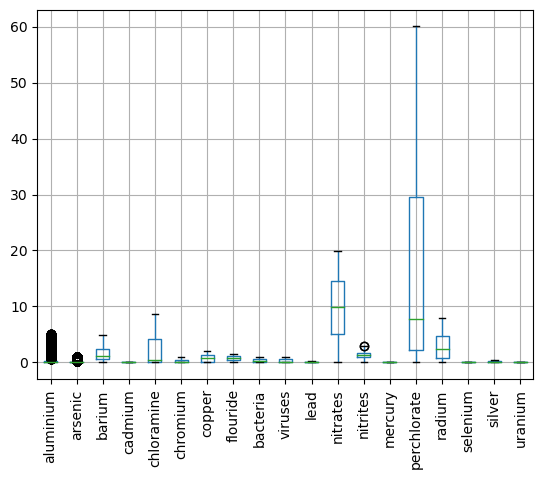

In [18]:
# outliers

water.boxplot()
plt.xticks(rotation=90)
plt.show()

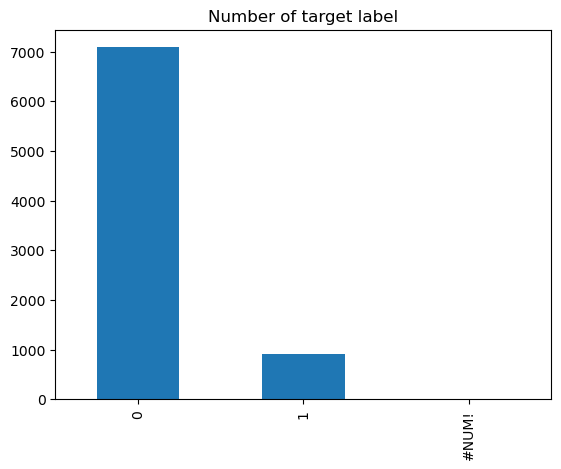

In [19]:
water.is_safe.value_counts().plot(kind ='bar')

plt.title('Number of target label')

#show the plot
plt.show()

As it shown , we have two issues 


1-we are facing the problem that there’s some rows have the value NUM! Which is not correct 

2-also ,we are dealing with extremely unbalanced data

# **Preprocessing**

In [20]:
# remove rows that contain 'NUM!'
water = water[~water['is_safe'].str.contains('NUM!')]

In [21]:
# remove rows that contain 'NUM!'
water = water[~water['ammonia'].str.contains('NUM!')]

In [22]:
water['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

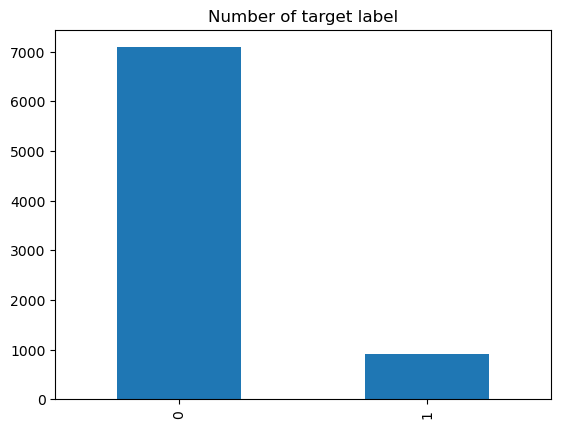

In [23]:
water.is_safe.value_counts().plot(kind ='bar')

plt.title('Number of target label')

#show the plot
plt.show()

In [24]:
water.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

In [25]:
#convert both columns to numeric data type
water['ammonia'] = pd.to_numeric(water['ammonia'])
water['is_safe'] = pd.to_numeric(water['is_safe'])

In [26]:
water.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

In [27]:
water.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


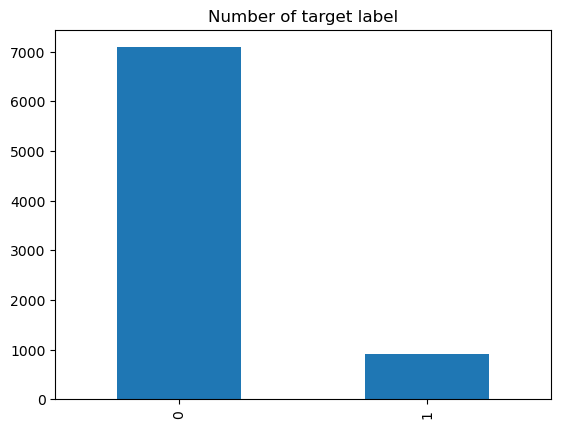

In [28]:
#check the class frequency using value_counts and find the class distribution ratio before solving the problem

water.is_safe.value_counts().plot(kind ='bar')

plt.title('Number of target label')

#show the plot
plt.show()

In [29]:
water.corr()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,...,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,...,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,...,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,...,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,...,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,...,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,...,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,...,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,...,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,...,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077


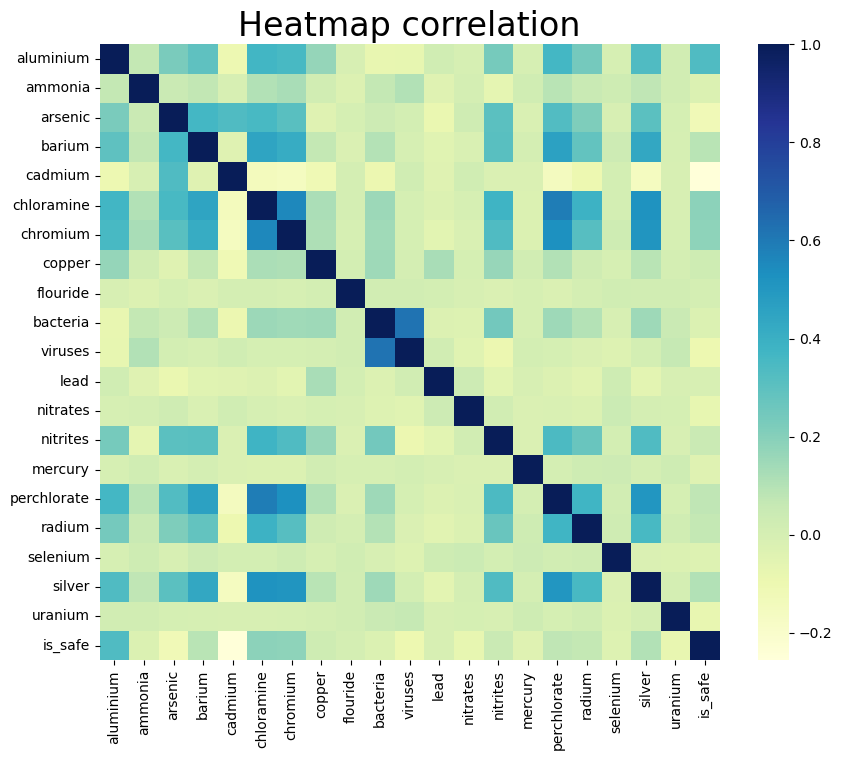

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(water.corr(), cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [31]:
X = water.drop(['is_safe'], axis=1)
y = water['is_safe']

In [32]:
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [33]:
y

0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7996, dtype: int64

In [34]:
scaler=MinMaxScaler()
normalized=scaler.fit_transform(X)
print(normalized)

[[0.32673267 0.30614973 0.03809524 ... 0.8        0.68       0.22222222]
 [0.45940594 0.70989305 0.00952381 ... 0.8        0.54       0.55555556]
 [0.2        0.47125668 0.03809524 ... 0.7        0.88       0.11111111]
 ...
 [0.01782178 0.23161765 0.         ... 0.         0.08       0.55555556]
 [0.0019802  0.3368984  0.00952381 ... 0.         0.         0.        ]
 [0.00792079 0.23161765 0.00952381 ... 0.         0.08       0.55555556]]


In [35]:
y.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

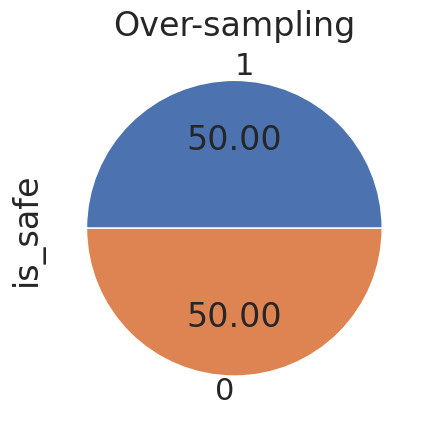

In [36]:
#Random Oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority") # String
X, y = ros.fit_resample(X, y)

ax = y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [37]:
y.value_counts()

1    7084
0    7084
Name: is_safe, dtype: int64

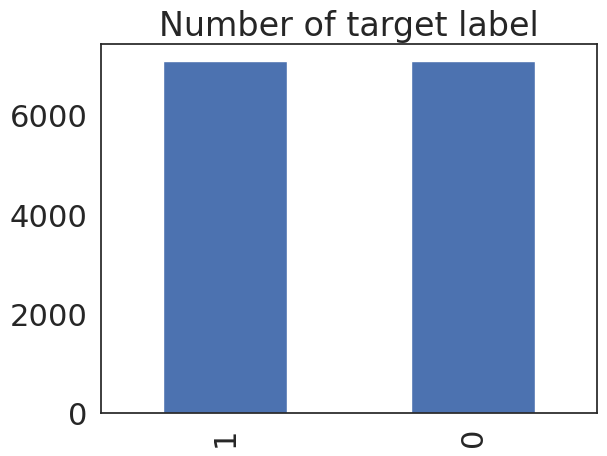

In [38]:
y.value_counts().plot(kind ='bar')

plt.title('Number of target label')

#show the plot
plt.show()

## DT model

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # 80% TRAIN 20% TEST

In [40]:
X_train.shape,X_test.shape

((11334, 20), (2834, 20))

In [41]:
y_train.shape, y_test.shape

((11334,), (2834,))

In [42]:
DT_model= DecisionTreeClassifier() 
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
DT_pred =DT_model.predict(X_test)

In [44]:
DT_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [45]:
feature_names= X.columns

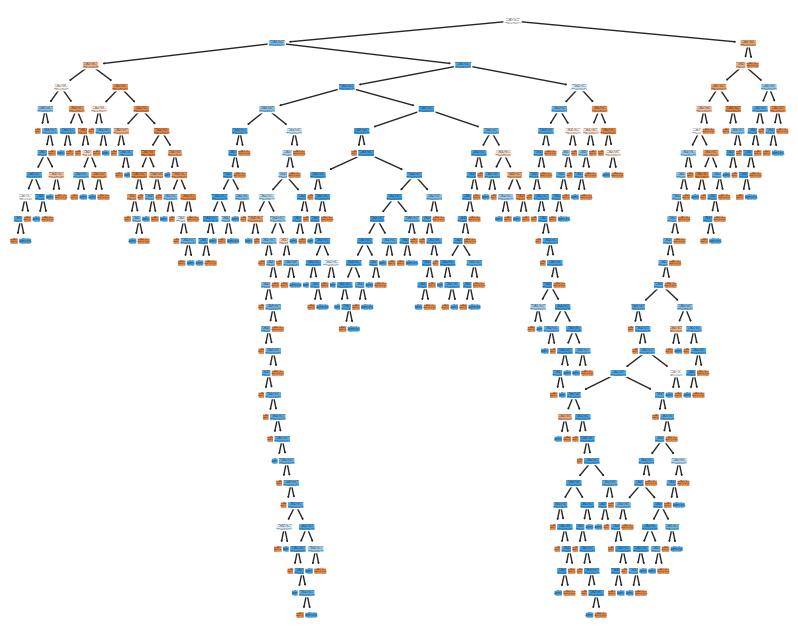

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(DT_model,
          feature_names=feature_names,
          class_names={0:"not safe",1:"safe"},
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True);

In [47]:
print('Training set score: {:.4f}'.format(DT_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(DT_model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9884


In [48]:
print('confusion matrix: ')
confusion_matrix(y_test, DT_pred,labels=[0,1])  

confusion matrix: 


array([[1348,   33],
       [   0, 1453]])

In [49]:
DT_acc = accuracy_score(y_test, DT_pred)
print('Accuracy is: ',DT_acc)
print('Misclassification Rate',1 - metrics.accuracy_score(y_test, DT_pred))


Accuracy is:  0.9883556810162315
Misclassification Rate 0.011644318983768498


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1381
           1       0.98      1.00      0.99      1453

    accuracy                           0.99      2834
   macro avg       0.99      0.99      0.99      2834
weighted avg       0.99      0.99      0.99      2834



# Try different hyperparameters during training 


**Use GridSearchCV to find the best values for hyperparameter**

In [51]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,5),
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

# Create a decision tree classifier
DT_model_h = DecisionTreeClassifier(random_state=0)

# Use GridSearchCV to find the best hyperparameters
DT_model_h = GridSearchCV(DT_model_h, params, cv=5,n_jobs=5,verbose=1)

In [52]:
DT_model_h.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6,
                                          0.8],
                         'splitter': ['best', 'random']},
             verbose=1)

In [53]:
h_pred =DT_model_h.predict(X_test)

In [54]:
# Print the best hyperparameters
print("Best hyperparameters is:", DT_model_h.best_params_)

Best hyperparameters is: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'splitter': 'best'}


In [55]:
# Create a decision tree classifier with the best hyperparameters
DT_best = DecisionTreeClassifier(criterion ='gini', max_depth = 4, max_features =None, splitter ='best')
DT_best.fit(X_train, y_train)
best_pred = DT_best.predict(X_test)

DT_acc_best = accuracy_score(y_test, best_pred)
print('Accuracy is: ',DT_acc_best)
print('Misclassification Rate',1 - metrics.accuracy_score(y_test, best_pred))
# Make predictions on the testing data

print(classification_report(y_test,best_pred))

Accuracy is:  0.8969654199011997
Misclassification Rate 0.10303458009880029
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1381
           1       0.94      0.86      0.89      1453

    accuracy                           0.90      2834
   macro avg       0.90      0.90      0.90      2834
weighted avg       0.90      0.90      0.90      2834



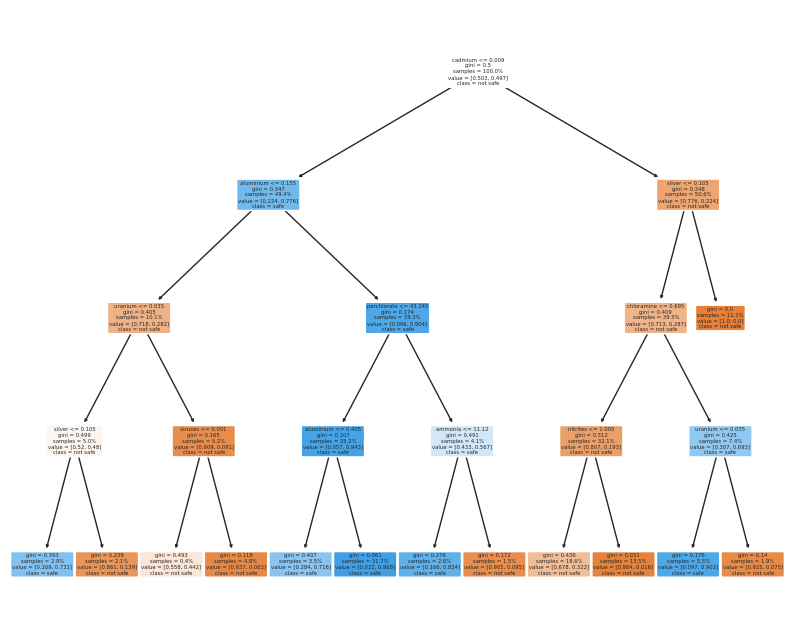

In [56]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(DT_best,
          feature_names=feature_names,
          class_names={0:"not safe",1:"safe"},
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True);

In [57]:
print('Training set score: {:.4f}'.format(DT_best.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(DT_best.score(X_test, y_test)))

Training set score: 0.8902
Test set score: 0.8970


# **TALKING ABOUT NEW MODEL (SVM)**

In [58]:
#Run SVM with default hyperparameters
from sklearn.svm import SVC

# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7936


In [59]:
#Step 3: Confusion Matrix and Evalution matrix
from sklearn.metrics import confusion_matrix
SVM_acc = accuracy_score(y_test, y_pred)
print('Accuracy is: ',SVM_acc)
print('Misclassification Rate',1 - metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm
print(classification_report(y_test,y_pred))

Accuracy is:  0.7935779816513762
Misclassification Rate 0.20642201834862384
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1381
           1       0.80      0.79      0.80      1453

    accuracy                           0.79      2834
   macro avg       0.79      0.79      0.79      2834
weighted avg       0.79      0.79      0.79      2834



In [60]:
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.7874
Test set score: 0.7936


**Hyperparameter using GridSearch CV**

In [61]:
# declare parameters for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   6.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.534 total time=   6.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   6.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   6.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.534 total time=   6.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=   4.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   3.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.704 total time=   3.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   3.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.722 total time=   4.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.777 total time=   2.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [62]:
print("Best hyperparameters is:", grid.best_params_)

Best hyperparameters is: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [63]:
classifier = SVC(kernel = 'rbf', gamma = 1 , C = 100)
classifier.fit(X_train, y_train)

SVC(C=100, gamma=1)

In [64]:
SVM_pred =classifier.predict(X_test)

In [65]:
#Step 3: Confusion Matrix and Evalution matrix
from sklearn.metrics import confusion_matrix
SVM_acc = accuracy_score(y_test, SVM_pred)
print('Accuracy is: ',SVM_acc)
print('Misclassification Rate',1 - metrics.accuracy_score(y_test, SVM_pred))
cm = confusion_matrix(y_test, SVM_pred)
cm
print(classification_report(y_test,SVM_pred))

Accuracy is:  0.9901199717713479
Misclassification Rate 0.009880028228652082
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1381
           1       0.98      1.00      0.99      1453

    accuracy                           0.99      2834
   macro avg       0.99      0.99      0.99      2834
weighted avg       0.99      0.99      0.99      2834



In [66]:
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.9993
Test set score: 0.9901


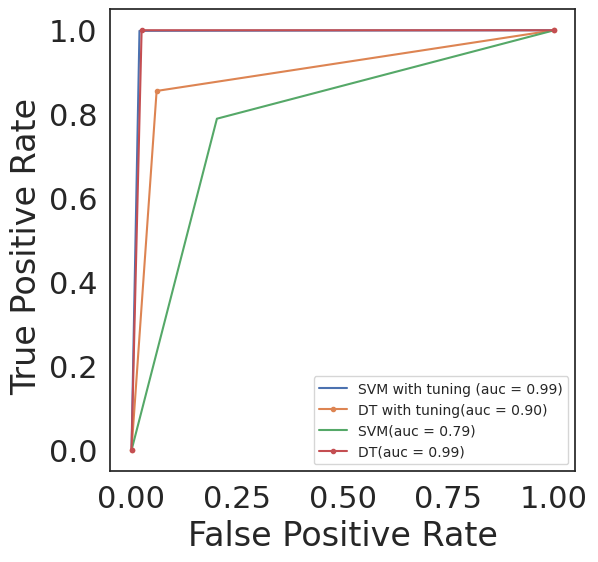

In [85]:
from sklearn.metrics import roc_curve, auc
#best_dt
dt_fpr, dt_tpr, threshold = roc_curve(y_test, best_pred)
auc_dt = auc(dt_fpr, dt_tpr)
#best_svm
svm_fpr, svm_tpr, threshold = roc_curve(y_test, SVM_pred)
auc_svm = auc(svm_fpr, svm_tpr)
#dt
DT_fpr, DT_tpr, threshold = roc_curve(y_test, DT_pred)
auc_DT = auc(DT_fpr, DT_tpr)
#svm
SVM_fpr, SVM_tpr, threshold = roc_curve(y_test, y_pred)
auc_SVM = auc(SVM_fpr, SVM_tpr)


plt.figure(figsize=(6, 6), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM with tuning (auc = %0.2f)' % auc_svm)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT with tuning(auc = %0.2f)' % auc_dt)
plt.plot(SVM_fpr, SVM_tpr, linestyle='-', label='SVM(auc = %0.2f)' % auc_SVM)
plt.plot(DT_fpr, DT_tpr, marker='.', label='DT(auc = %0.2f)' % auc_DT)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')

plt.legend(fontsize="10")

plt.show()